# Problems with Gradient Descent

1. **More minima**

    By increasing the number of predictors, we increase the number of dimensions of the intervening mathematical functions. Thus, in simpler terms, there will be more ground to cover. Also, the shape of behavior of these functions becomes much more complex; The number of local minima that we might find tends to increase. Local minima are problematic since our algorithm may simply stop there, believing it has actually arrived at the global minimum. Therefore, the more local minima, the more challenging it will be for our algorithm to find the global minimum.

1. **More ground to cover**

    Each dimension greatly increases the amount of ground to cover. This increases the time it takes to find the global minimum.


To help alleviate these problems, we use a less computationally expensive version of the gradient descent algorithm: **the stochastic gradient descent (SGD).**

The main idea behind it is that when we update the weight and bias, **we only use a sample of the data instead of all the data**. Let's see what we mean by looking at our implementation of the algorithm:

In [ ]:
def gradient_descent(x, y,
                     iterations = 1000, learning_rate = 0.0001, tolerance = 1e-4,
                     current_weight = 0.1, current_bias = 0.01):
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)

        if previous_cost and abs(previous_cost-current_cost) < tolerance:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        weight_derivative = -(2/n) * sum(x * (y-y_predicted)) # We're using the whole dataset
        bias_derivative = -(2/n) * sum(y-y_predicted)         # We're using the whole dataset

        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

    print(f"Iteration {i+1}: Cost {current_cost}")

    return current_weight, current_bias

# SGD in Scikit-learn

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        sgdr = SGDRegressor()                # Instantiating the model
        sgdr.fit(X_train, y_train)           # Training the model
        y_pred = sgdr.predict(X_test) # Making a prediction

        print(mean_squared_error(y_test, y_pred))

## Hyperparameters

let's dig into some of its hyperparameters.

`loss`: this refers to the cost function to use. The default value is `squared_error`, which corresponds exactly to mean squared error, which we've been using.

`learning_rate`: careful! This isn't what it seems; it's not the actual learning rate but, rather, the behavior that the learning rate should have. Scikit-learn's implementation of stochastic gradient descent, by default, lowers the learning rate with each iteration.

`eta0`: this is the learning rate! The name of the parameter is the letter greek $\eta$ followed by 0 to signify that it is the first learning rate.

`tol`: the tolerance.

`max_iter`: the maximum number of iterations.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgdr = SGDRegressor(
    learning_rate = "constant",
    eta0 = 1e-4,
    tol = 1e-4,
    max_iter = 25,
)

sgdr.fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

sgdr_mse = mean_squared_error(y_test, y_pred)

# SGD vs. Gradient Descent

we'll compare `SGDRegressor` with our implementation of `gradient descent`. We'll do this by checking how many iterations it takes our implementation to get similar results to `SGDRegressor`.

On the previous screen, we saw that our implementation of gradient descent needed around **500 iterations** to catch up to **SGD's 25!** That's a pretty big difference that will compound when working with huge amounts of data!

# Applying SGD in Real Data

We'll be using a curated version of the BMI dataset. 

Our dataset contains the columns `Height` (in meters), `Weight` (in kilograms), and `OW`, which tells us whether the subject is overweight or not.

We'll try to predict **Weight using Height**. Firstly, by scatter-plotting the columns against each other, we see that their relationship isn't particularly linear.

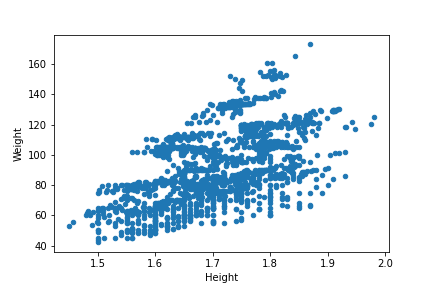